# DATA prosessing for 3D RT cloud study

Author: Meng Gao

Date: 07/02/2018

Course: Cyber Training 

Note: Please modify all relevant path to your local path, 

and store the necessary data in the local directory.

The current notebook is created in a local machine. 

## Load modules

In [2]:
import numpy as np
import os,fnmatch
import h5py
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
import matplotlib.pyplot as plt
%matplotlib inline

## Define functions

In [ ]:
def read_3dshdom(filebase1,nx=50*50):
    '''
    read reflectance from shdom output file
    by MG
    '''
    file2=filebase1+'*r.out'
    radv1=[]
    angv1=[]

    nh=nx+1
    for filet in os.listdir(path):
        if fnmatch.fnmatch(filet, file2):
            filename=path+filet
            print(filename)
            nt=9
            h1=19+nh*nt
            h2=20+nh*nt
            dat0=np.genfromtxt(filename, skip_header=h1,max_rows=1)
            dat1=np.genfromtxt(filename, skip_header=h2,max_rows=nx)
            angv1.append(dat0[1:3]) #angle mu, phi
            radv1.append(dat1) #x, y, radiance
    mradv=np.pi*np.array(radv1)

    return np.reshape(mradv[0,:,2],(50,50)).T

In [ ]:
def plot_lookup(rad086v,rad21v,mrad086v,mrad21v,name='test'):
    '''
    plot lookup table for inspection
    rad086v and rad21v are look up tables
    mrad086v,mrad21v are the data input
    Author: Meng Gao 
    Date:   05/2018
    '''

    
    print(len(reffv),len(tauv))

    plt.figure(figsize=(3,3))
    for ireff in range(7):
        #ireff=0
        plt.plot(rad086v[ireff,:],rad21v[ireff,:],'k-')

    for itau in range(15):
        #ireff=0
        plt.plot(rad086v[:,itau],rad21v[:,itau],'k-')

    for k in range(len(reffv)):
        plt.text(rad086v[k,14]+0.05,rad21v[k,14],reffv[k])

    for k in range(len(tauv)):
        plt.text(rad086v[0,k]-0.05,rad21v[0,k]+0.05,tauv[k],rotation=-30,fontsize=9)
    plt.xlabel("R(0.86$\mu$m)")
    plt.ylabel("R(2.1$\mu$m)")
    plt.title("Solar Zenith:"+str(sz1)+"$^\circ$")
    #plt.axis((0,1.0,0,0.6)) #0
    #plt.axis((0,1.1,0,0.6)) #0
    plt.axis((0,0.9,0,0.6)) #60
    #plt.axis((0,1.0,0,0.7))

    plt.plot(mrad086v.flatten(),mrad21v.flatten(),'.', alpha=0.2)


    fileout='/Users/mgao/Desktop/sz_nz'+str(name)+str(nz)+'_rad'+str(sz1)+'.pdf'
    plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)




def serach_lookup(mrad086v, mrad21v,nx=50, ny=50):
    '''
    locate value in the look up table
    need use interpolated tau and reff
    return averaged tau, and reff as t1, r1
    Author: Meng Gao 
    Date:   05/2018
    '''
    
    reffv2=np.linspace(5,35,31)
    tauv2=np.linspace(0.1,35,350)

    index=0
    t1=np.zeros((nx,ny))
    r1=np.zeros((nx,ny))
    for itau in range(len(tauv2)-1):
        for ireff in range(len(reffv2)-1):
            tmp1=np.array([[rad086vi(tauv2[i],reffv2[j]) for i in range(itau,itau+2)] for j in range(ireff,ireff+2)])
            tmp2=np.array([[rad21vi(tauv2[i],reffv2[j]) for i in range(itau,itau+2)] for j in range(ireff,ireff+2)])
            #dat1<rad086vi(tauv2[itau],reffv2[ireff]),rad21vi(tauv2[itau],reffv2[ireff])
            for xi in range(nx):
                for yi in range(ny):
                    a1=mrad086v[xi,yi]
                    b1=mrad21v[xi,yi]
                    if((a1<=tmp1.max() and a1>=tmp1.min()) and (b1<=tmp2.max() and b1>=tmp2.min())):
                        t1[xi,yi]=(tauv2[itau]+tauv2[itau+1])/2
                        r1[xi,yi]=(reffv2[ireff]+reffv2[ireff+1])/2
                        break
    return t1, r1

In [ ]:
def plot_search_result(r1,t1, name='test'):
    '''
    Plot the retrieval results
    Author: Meng Gao 
    Date:   05/2018
    
    '''
    plt.figure(figsize=(6,3))
    ax=plt.subplot(121)
    plt.plot(cot1.flatten(), t1.flatten(),'.')
    xv=np.linspace(0,40,40)
    plt.plot(xv,xv)
    plt.title("MODIS COT")
    plt.xlabel("True")
    plt.ylabel("Retrieval")

    ax=plt.subplot(122)

    plt.plot(cer1i.flatten(), r1.flatten(),'.')
    xv=np.linspace(0,20,20)
    plt.plot(xv,xv)
    plt.title("MODIS CER")
    plt.xlabel("True")
    plt.ylabel("Retrieval")
    fileout='/Users/mgao/Desktop/modis_corr'+str(name)+'.pdf'
    plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)
    plt.tight_layout()

## read  data

/Users/mgao/Box Sync/CyberTraining/research/DATA/surrogate_cloud/MOD06_L2.A2000306.2325._cot_0900_0250SurrCOTCHTCER_1.nc


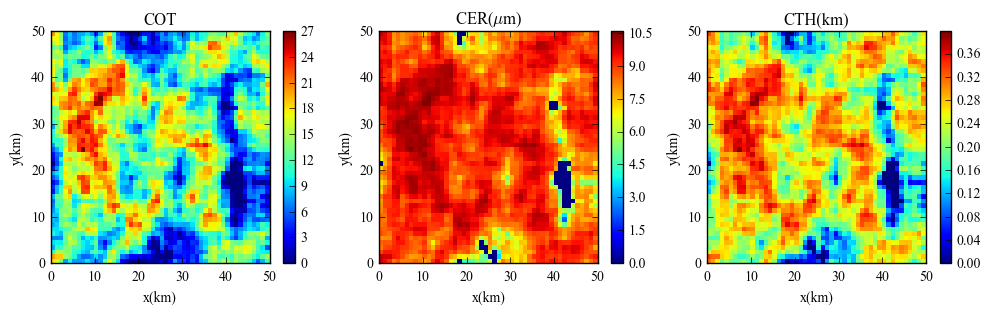

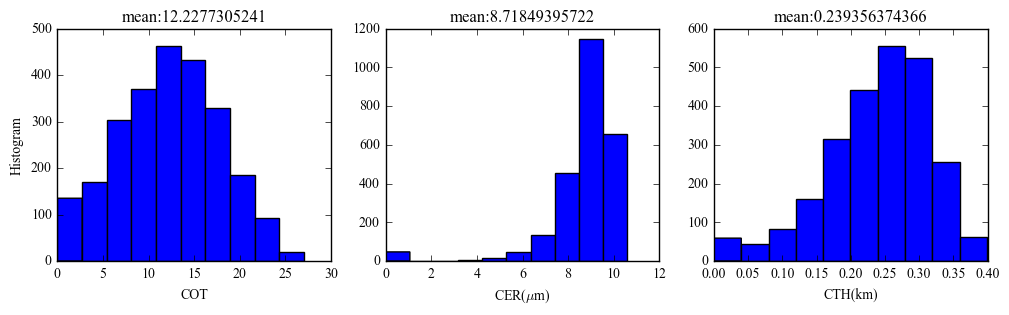

In [83]:
# Please specify the data path for the cloud cot, cth and cer
# replace the following path:

path='/Users/mgao/Box Sync/CyberTraining/research/DATA/surrogate_cloud/'

#filename='/Users/mgao/Box Sync/CyberTraining/research/DATA/MOD06_L2.A2000306.2325._cot_0900_0250COTCHT.nc'
filename=path+'MOD06_L2.A2000306.2325._cot_0900_0250COTCHT.nc'
#for index in ['COTCHT']:#['COTCHT','SurrCOTCHTCER_1','SurrCOTCHTCER_2','SurrCOTCHTCER_3','SurrCOTCHTCER_4']:
for index in ['SurrCOTCHTCER_1']:#,'SurrCOTCHTCER_2','SurrCOTCHTCER_3','SurrCOTCHTCER_4']:
    filename=path+'MOD06_L2.A2000306.2325._cot_0900_0250'+index+'.nc'
    print(filename)
    #filename='/Users/mgao/Box Sync/CyberTraining/research/DATA/MOD06_L2.A2000306.2325._cot_0900_0250SurrCOTCHT.nc'
    f = h5py.File(filename, 'r')
    cot1 = f['tau'][()].T
    cth1 = f['CHT'][()].T/1000
    cer1 = f['CER'][()].T
    nx=50
    ny=50
    cer1i = np.array([[cer1[i,j] for j in range(ny)]for i in range(nx)])

    fig=plt.figure(figsize=(12,3))
    ax1=plt.subplot(131)
    plt.pcolor(cot1)
    plt.colorbar()
    plt.xlabel("x(km)")
    plt.ylabel("y(km)")
    plt.title("COT")
    ax1=plt.subplot(132)

    plt.pcolor(cer1)#,vmin=4, vmax=16)
    plt.colorbar()
    plt.title("CER($\mu$m)")
    plt.xlabel("x(km)")
    plt.ylabel("y(km)")

    ax1=plt.subplot(133)
    plt.pcolor(cth1)
    plt.colorbar()
    plt.title("CTH(km)")
    plt.xlabel("x(km)")
    plt.ylabel("y(km)")

    fileout='/Users/mgao/Desktop/modis21_cth'+str(index)+'.pdf'
    plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)

    fig=plt.figure(figsize=(12,3))
    ax1=plt.subplot(131)
    cot2=cot1.flatten()
    plt.hist(cot2)
    plt.xlabel("COT")
    plt.ylabel("Histogram")
    plt.title("mean:"+str(sum(cot2)/len(cot2)))

    ax1=plt.subplot(132)
    cer2=cer1.flatten()
    plt.hist(cer2)
    plt.title("mean:"+str(sum(cer2)/len(cer2)))
    plt.xlabel("CER($\mu$m)")

    ax1=plt.subplot(133)
    cth2=cth1.flatten()
    plt.hist(cth2)
    plt.title("mean:"+str(sum(cth2)/len(cth2)))
    plt.xlabel("CTH(km)")

    fileout='/Users/mgao/Desktop/modis21_cth_hist'+str(index)+'.pdf'
    plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)

## read 3d RT data

In [47]:
#please specify th 3D RT simulation data path
nz=50
path="/Users/mgao/Box Sync/CyberTraining/research/3DRT/test/shdom/cloud_2d_modis4/" #height from scott
filebase1d1='output_60_0.86_index22_nz50_3' #dx, dy=1,1, T=0 nz=200 #0:3d, 3: 1d
filebase2d1='output_60_2.1_index22_nz50_3'

filebase1d3='output_60_0.86_index22_nz50_0' #dx, dy=1,1, T=0 nz=200 #0:3d, 3: 1d
filebase2d3='output_60_2.1_index22_nz50_0'
index=22

sz1=60#0 #30,60

In [49]:
mrad086v2d3=read_3dshdom(filebase1d3)
mrad21v2d3=read_3dshdom(filebase2d3)
mrad086v2d1=read_3dshdom(filebase1d1)
mrad21v2d1=read_3dshdom(filebase2d1)

/Users/mgao/Box Sync/CyberTraining/research/3DRT/test/shdom/cloud_2d_modis4/output_60_0.86_index22_nz50_0r.out
/Users/mgao/Box Sync/CyberTraining/research/3DRT/test/shdom/cloud_2d_modis4/output_60_2.1_index22_nz50_0r.out
/Users/mgao/Box Sync/CyberTraining/research/3DRT/test/shdom/cloud_2d_modis4/output_60_0.86_index22_nz50_3r.out
/Users/mgao/Box Sync/CyberTraining/research/3DRT/test/shdom/cloud_2d_modis4/output_60_2.1_index22_nz50_3r.out


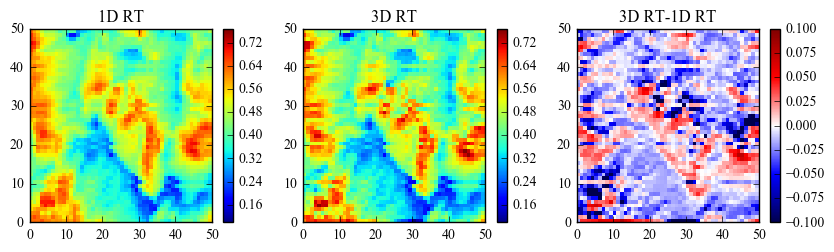

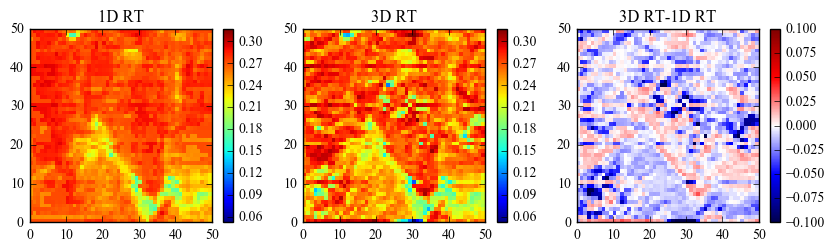

In [59]:

fig=plt.figure(figsize=(10,2.5))
vmin1=np.array([mrad086v2d1,mrad086v2d3]).min()
vmax1=np.array([mrad086v2d1,mrad086v2d3]).max()
ax=plt.subplot(131)
plt.pcolor(mrad086v2d1,vmin=vmin1,vmax=vmax1)
plt.colorbar()
plt.title("1D RT")
ax=plt.subplot(132)
plt.pcolor(mrad086v2d3,vmin=vmin1,vmax=vmax1)
plt.colorbar()
plt.title("3D RT")
ax=plt.subplot(133)
#vmax1=abs(mrad086v2d3-mrad086v2d1).max()
vmax1=0.1
vmin1=-vmax1
plt.pcolor(mrad086v2d3-mrad086v2d1,vmin=vmin1, vmax=vmax1, cmap='seismic')
plt.title("3D RT-1D RT")
plt.colorbar()
fileout='/Users/mgao/Desktop/modis_rt'+str(index)+'.pdf'
plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)
#plt.close()

fig=plt.figure(figsize=(10,2.5))
vmin1=np.array([mrad21v2d1,mrad21v2d3]).min()
vmax1=np.array([mrad21v2d1,mrad21v2d3]).max()
ax=plt.subplot(131)
plt.pcolor(mrad21v2d1,vmin=vmin1,vmax=vmax1)
plt.colorbar()
plt.title("1D RT")
ax=plt.subplot(132)
plt.pcolor(mrad21v2d3,vmin=vmin1,vmax=vmax1)
plt.colorbar()
plt.title("3D RT")
ax=plt.subplot(133)
#vmax1=abs(mrad21v2d3-mrad21v2d1).max()
vmax1=0.1
vmin1=-vmax1

plt.pcolor(mrad21v2d3-mrad21v2d1,vmin=vmin1, vmax=vmax1, cmap='seismic')
plt.title("3D RT-1D RT")
plt.colorbar()
fileout='/Users/mgao/Desktop/modis21_rt'+str(index)+'.pdf'
plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)
#plt.close()

In [52]:
rad086v=np.load("rad086lookup60.npy")
rad21v=np.load("rad21lookup60.npy")
    
#grids
reffv=np.array(range(5,40,5))
tauv=np.array([0.1, 0.5, 1.0, 1.3, 1.7, 2.2, 3.0, 4.0,5.0,7.0,10.0,15.0,20.0,25.0,30.0])

#When on a regular grid with x.size = m and y.size = n, if z.ndim == 2, then z must have shape (n, m)
y=reffv
x=tauv
z1=rad086v
z2=rad21v
from scipy import interpolate
rad086vi=interpolate.interp2d(x, y, z1, kind='linear')
rad21vi=interpolate.interp2d(x, y, z2, kind='linear')#'linear')
#the fitted rad(x,y)


## searching

7 15
7 15


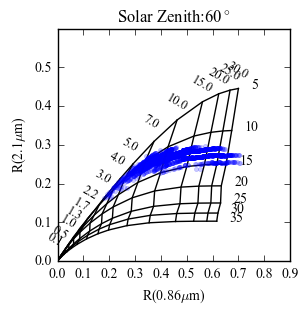

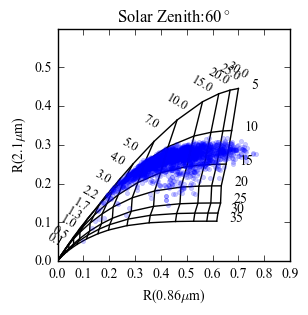

In [55]:
plot_lookup(rad086v,rad21v,mrad086v2d1,mrad21v2d1,'1d')
plot_lookup(rad086v,rad21v,mrad086v2d3,mrad21v2d3,'3d')

In [56]:
t1d1,r1d1=serach_lookup(mrad086v2d1,mrad21v2d1)

In [57]:
t1d3,r1d3=serach_lookup(mrad086v2d3,mrad21v2d3)

In [ ]:
#np.save("tau60_cloud3d",t1)
#np.save("cer60_cloud3d",r1)
#np.save("tau60_cloud1d",t1)
#np.save("cer60_cloud1d",r1)

## compare with retrieval

NameError: name 'cloud_cotv' is not defined

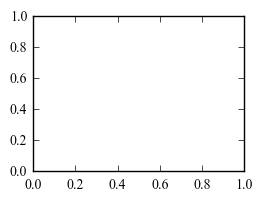

In [60]:
fig=plt.figure(figsize=(6,2))
ax=plt.subplot(121)
plt.hist(cloud_cotv[index].flatten())
plt.title("MODIS COT")
plt.xlabel("COT")
plt.ylabel("Histrogram")
ax=plt.subplot(122)
plt.hist(cloud_cerv[index].flatten())
plt.title("MODIS CER")
plt.xlabel("CER($\mu$m)")

fileout='/Users/mgao/Desktop/modis_his'+str(index)+'.pdf'
plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)

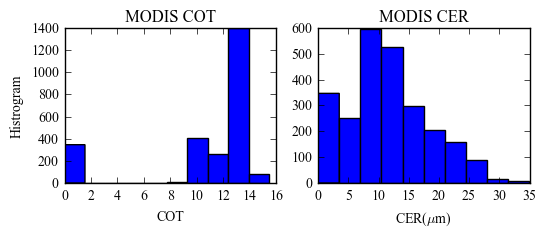

In [61]:
fig=plt.figure(figsize=(6,2))
ax=plt.subplot(121)
plt.hist(r1d1.flatten())
plt.title("MODIS COT")
plt.xlabel("COT")
plt.ylabel("Histrogram")
ax=plt.subplot(122)
plt.hist(t1d1.flatten())
plt.title("MODIS CER")
plt.xlabel("CER($\mu$m)")

fileout='/Users/mgao/Desktop/modis_his'+str(index)+'.pdf'
plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)

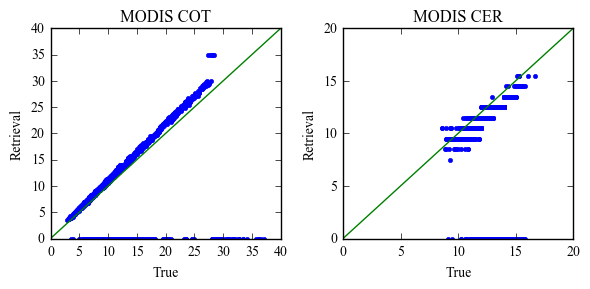

In [63]:
plot_search_result(r1d1,t1d1,'1d')

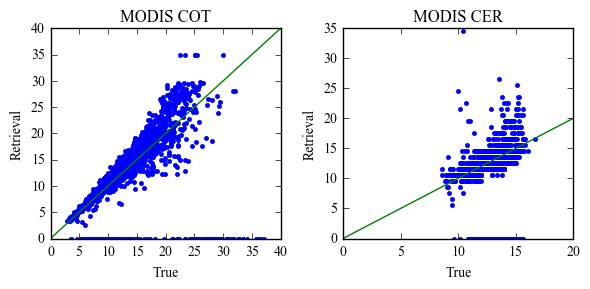

In [64]:
plot_search_result(r1d3,t1d3,'3d')

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

## different pixel for shadow and illuminating

In [66]:
delta1=mrad21v2d3-mrad21v2d1
delta2=mrad086v2d3-mrad086v2d1
rhigh0=[]
rhigh1=[]
rlow0=[]
rlow1=[]
r2=r1d3
t2=t1d3
r1=r1d1
t1=t1d1
for i in range(50):
    for j in range(50):
        if(delta1[i,j]>0 and delta2[i,j]>0 and r1[i,j]>0 and r2[i,j]>0 and t1[i,j]>0 and t2[i,j]>0):
            rhigh0.append(cer1[i,j])
            rhigh1.append(r2[i,j])
        elif(delta1[i,j]<0 and delta2[i,j]<0 and r1[i,j]>0 and r2[i,j]>0 and t1[i,j]>0 and t2[i,j]>0):
            rlow0.append(cer1[i,j])
            rlow1.append(r2[i,j])
            

thigh0=[]
thigh1=[]
tlow0=[]
tlow1=[]

for i in range(50):
    for j in range(50):
        if(delta1[i,j]>0 and delta2[i,j]>0 and r1[i,j]>0 and r2[i,j]>0 and t1[i,j]>0 and t2[i,j]>0):
            thigh0.append(cot1[i,j])
            thigh1.append(t2[i,j])
        elif(delta1[i,j]<0 and delta2[i,j]<0 and r1[i,j]>0 and r2[i,j]>0 and t1[i,j]>0 and t2[i,j]>0):
            tlow0.append(cot1[i,j])
            tlow1.append(t2[i,j])

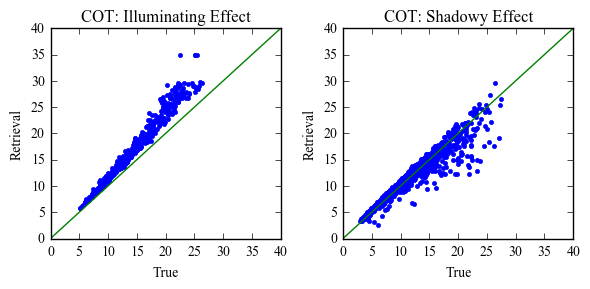

In [67]:
plt.figure(figsize=(6,3))
ax=plt.subplot(121)
plt.plot(thigh0, thigh1,'.')
xv=np.linspace(0,40,40)
plt.plot(xv,xv)
plt.title("COT: Illuminating Effect")
plt.xlabel("True")
plt.ylabel("Retrieval")

ax=plt.subplot(122)
                  
plt.plot(tlow0, tlow1,'.')
xv=np.linspace(0,40,40)
plt.plot(xv,xv)
plt.title("COT: Shadowy Effect")
plt.xlabel("True")
plt.ylabel("Retrieval")
fileout='/Users/mgao/Desktop/modis_cot_orr'+str(index)+'.pdf'
plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)
plt.tight_layout()

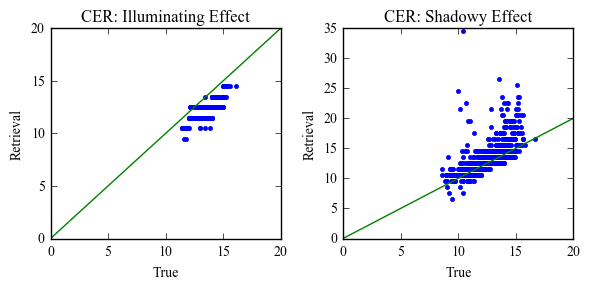

In [68]:
plt.figure(figsize=(6,3))
ax=plt.subplot(121)
plt.plot(rhigh0, rhigh1,'.')
#plt.plot(rlow0, rlow1,'r.')
xv=np.linspace(0,20,20)
plt.plot(xv,xv)
plt.title("CER: Illuminating Effect")
plt.xlabel("True")
plt.ylabel("Retrieval")

ax=plt.subplot(122)

                    
plt.plot(rlow0, rlow1,'.')
xv=np.linspace(0,20,20)
plt.plot(xv,xv)
plt.title("CER: Shadowy Effect")
plt.xlabel("True")
plt.ylabel("Retrieval")
fileout='/Users/mgao/Desktop/modis_cer_orr'+str(index)+'.pdf'
plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)
plt.tight_layout()

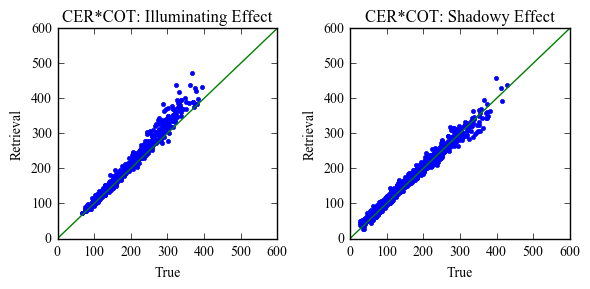

In [69]:
plt.figure(figsize=(6,3))
ax=plt.subplot(121)
plt.plot(np.array(rhigh0)*np.array(thigh0), np.array(rhigh1)*np.array(thigh1),'.')
#plt.plot(rlow0, rlow1,'r.')
#xv=np.linspace(0,20,20)
xv=np.linspace(0,600,600)
plt.plot(xv,xv)
plt.title("CER*COT: Illuminating Effect")
plt.xlabel("True")
plt.ylabel("Retrieval")

ax=plt.subplot(122)

                    
plt.plot(np.array(rlow0)*np.array(tlow0), np.array(rlow1)*np.array(tlow1),'.')
xv=np.linspace(0,600,600)
plt.plot(xv,xv)
plt.title("CER*COT: Shadowy Effect")
plt.xlabel("True")
plt.ylabel("Retrieval")
plt.tight_layout()
fileout='/Users/mgao/Desktop/modis_cwp21_orr'+str(index)+'.pdf'
plt.savefig(fileout, dpi=400, bbox_inches='tight', pad_inches=0.1)
